# ЛР №1

## Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать [набор данных, содержащий информацию о средних ценах на дома в Калифорнии.](https://www.kaggle.com/camnugent/california-housing-prices)

Этот набор данных служит отличным введением в реализацию алгоритмов машинного обучения, поскольку требует элементарной очистки данных, имеет легко понятный список переменных и имеет оптимальный размер.

#### Датасет состоит из одного файла:
'housing.csv'

#### Набор данных содержит следующие колонки:
   - **longitude** - долгота места расположения дома;
   - **latitude** - широта места расположения дома;
   - **housing_median_age** - средний возраст дома в квартале;
   - **total_rooms** - общее количество комнат в квартале;
   - **total_bedrooms** - общее количество спален в квартале;
   - **population** - общее количество людей, проживающих в квартале;
   - **households** - общее количество домохозяйств, групп людей, проживающих в пределах одного дома, в квартале;
   - **median_income** - средний доход домохозяйств в пределах квартала (измеряется в десятках тысяч долларов США);
   - **median_house_value** - средняя стоимость дома для домохозяйств в пределах квартала (измеряется в долларах США) - целевой признак;
   - **ocean_proximity** - Расположение дома у моря / океана.

### Импорт библиотек
Импортируем библиотеки с помощью команды import. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

In [2]:
data = pd.read_csv('data/housing.csv', sep=",")

## 2) Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Размер датасета (строки, столбцы)
data.shape

(20640, 10)

In [5]:
# Количество строк
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 20640


In [6]:
# Список колонок
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
# Основные статистические характеристки набора данных
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 3) Визуальное исследование датасета

### Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени). Рассмотрим распределение median_house_value и median_income с признаком ocean_proximity.

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

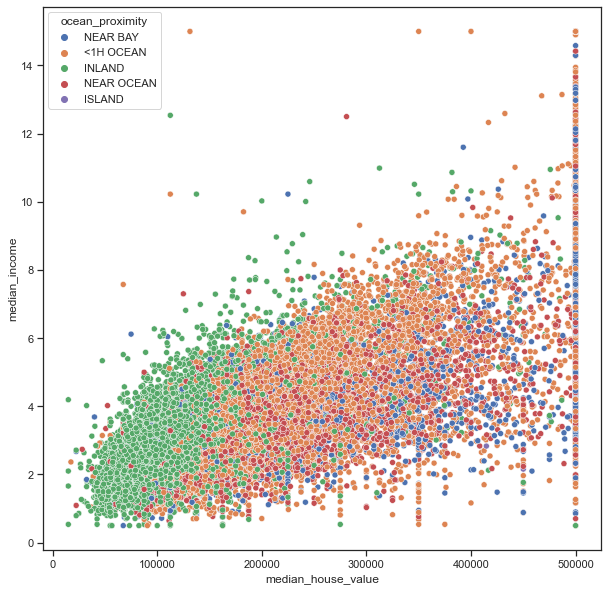

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='median_house_value', y='median_income', data=data, hue='ocean_proximity')

### Гистограмма
Позволяет оценить плотность вероятности распределения данных. Рассмотрим плотность распределения median_house_value:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

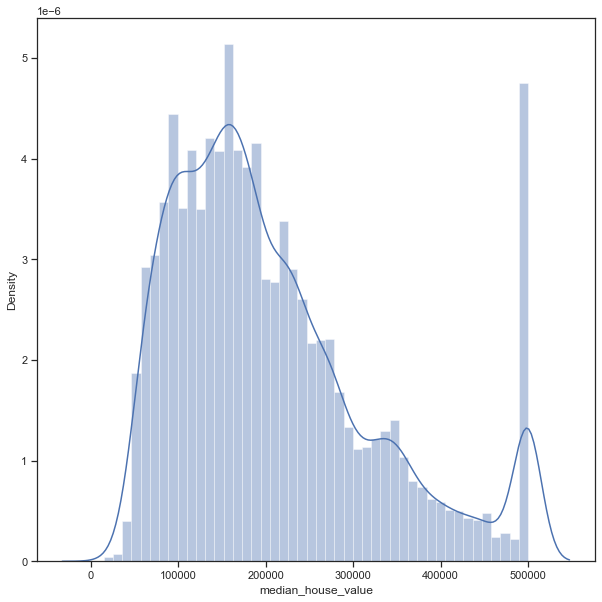

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['median_house_value'])

### Jointplot
Комбинация гистограмм и диаграммы рассеивания.

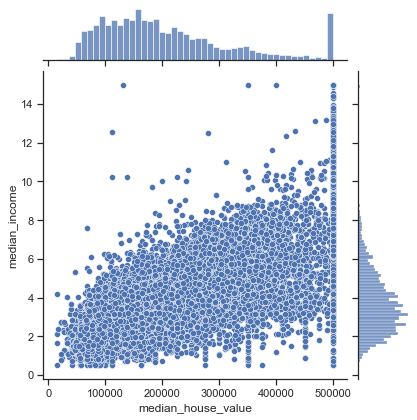

In [26]:
sns.jointplot(x='median_house_value', y='median_income', data=data)

### Парные диаграммы
Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

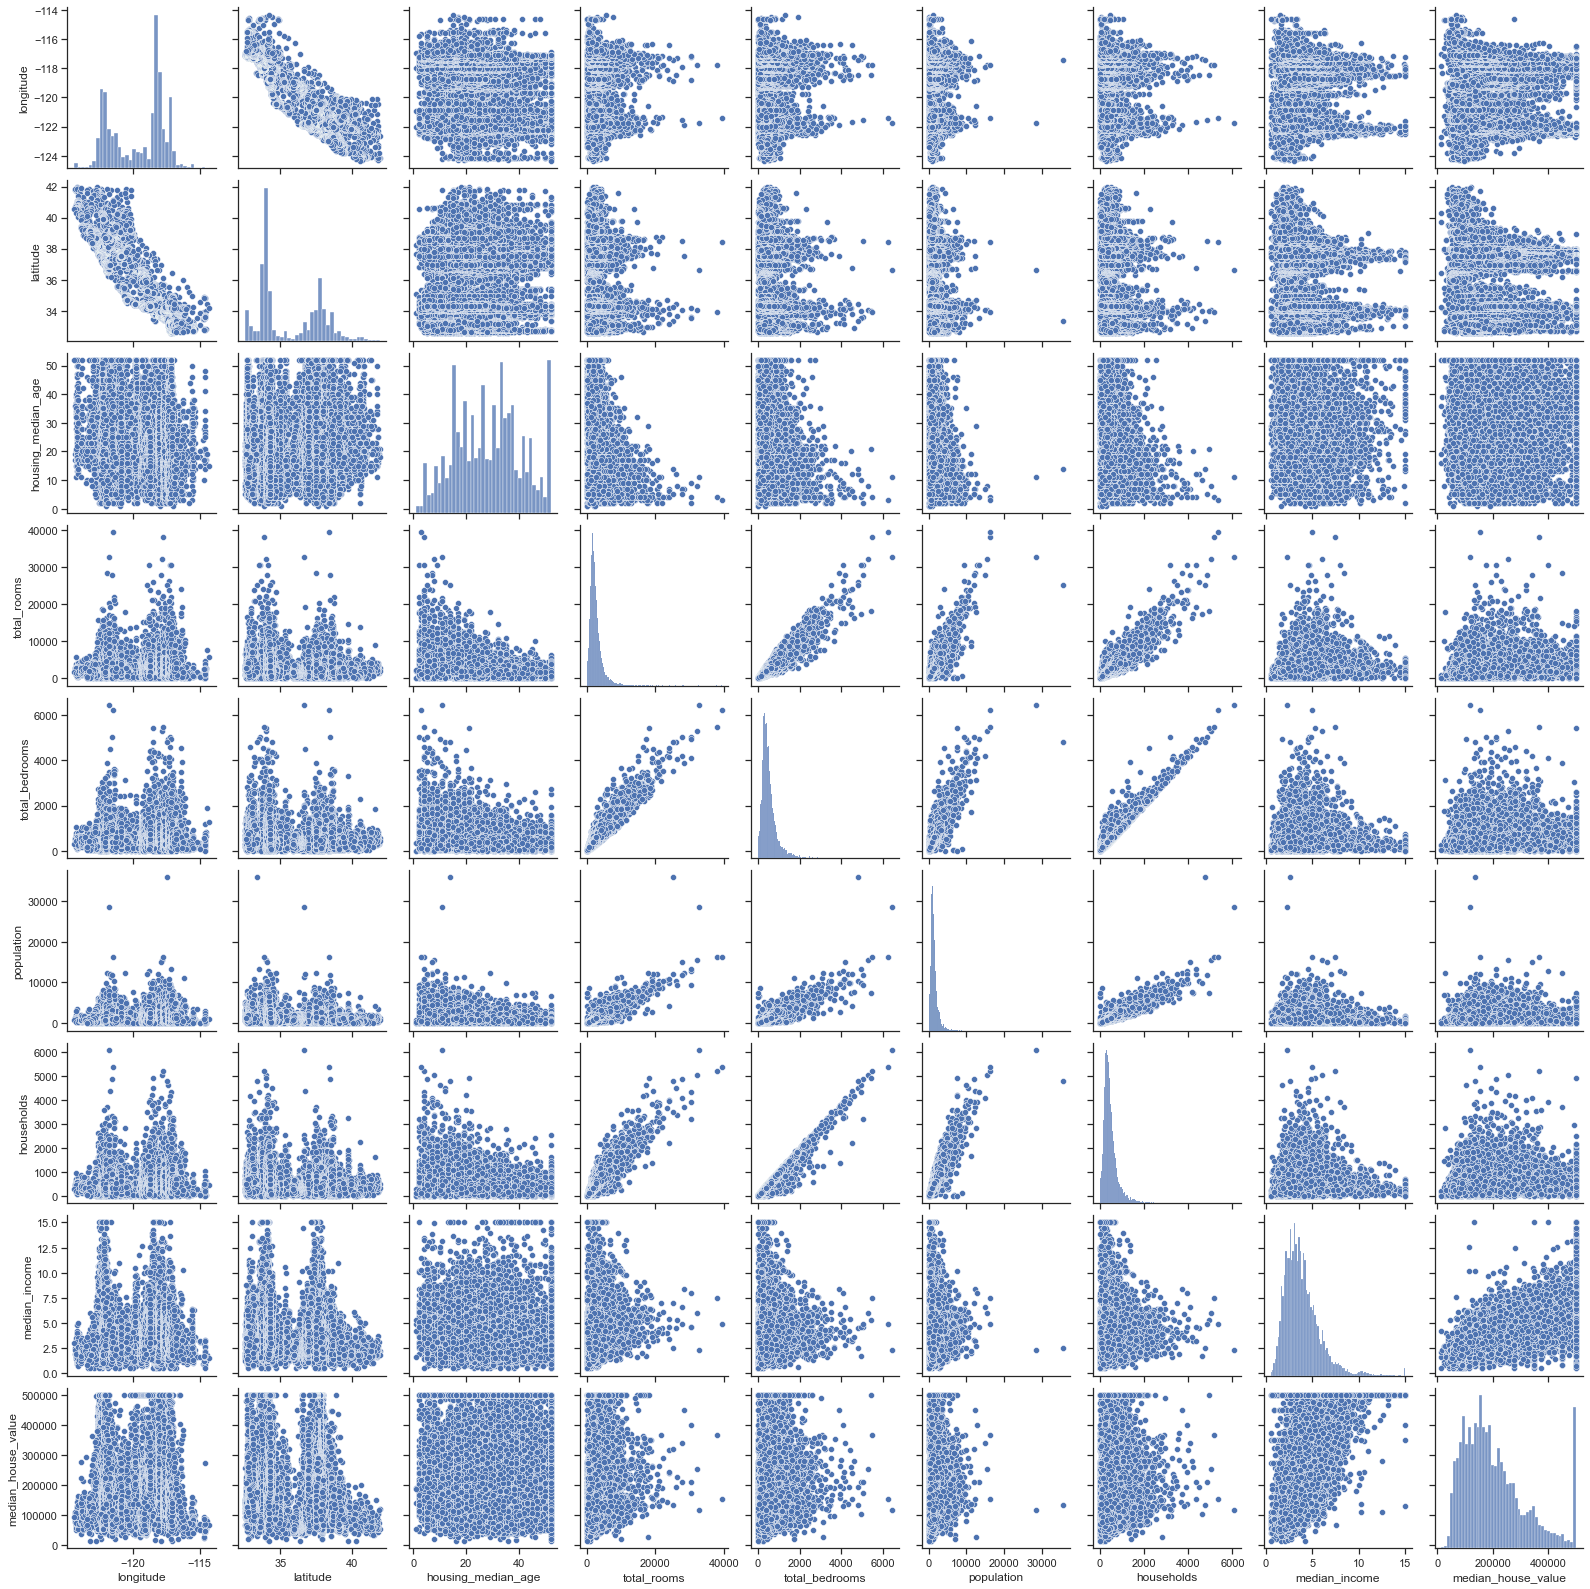

In [27]:
sns.pairplot(data)

### Ящик с усами
Представляет собой одномерное распределение вероятности.

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

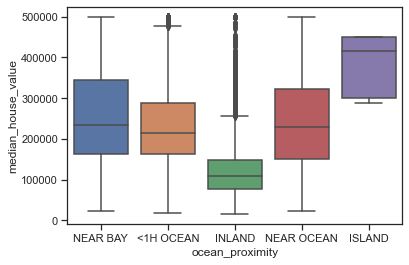

In [29]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)

### Скрипичная" диаграмма
От ящика с усами отличается добавлением распределения плотности.

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

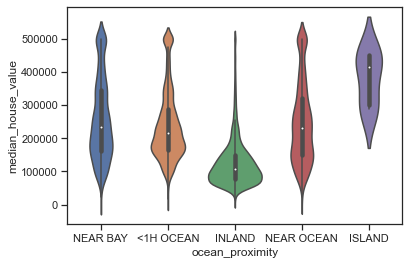

In [30]:
sns.violinplot(x='ocean_proximity', y='median_house_value', data=data)

## 4) Информация о корреляции признаков

In [31]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

Целевой признак (средняя стоимость дома в квартале) наиболее сильно коррелирует со средним доходом домохозяйств в квартале (0.68). Этот признак обязательно следует оставить в модели.
Целевой признак отчасти коррелирует с количеством комнат (0.13) и средним возрастом домов в квартале (0.10). Эти признаки стоит также оставить в модели.
Целевой признак слабо коррелирует с остальными. Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

### Heatmap
Показывает степень корреляции различными цветами.

<AxesSubplot:>

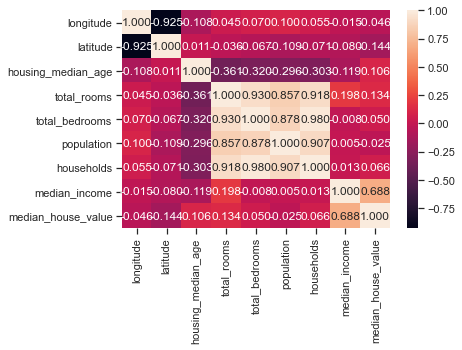

In [12]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<AxesSubplot:>

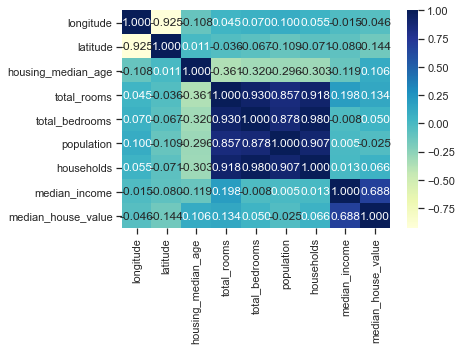

In [32]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<AxesSubplot:>

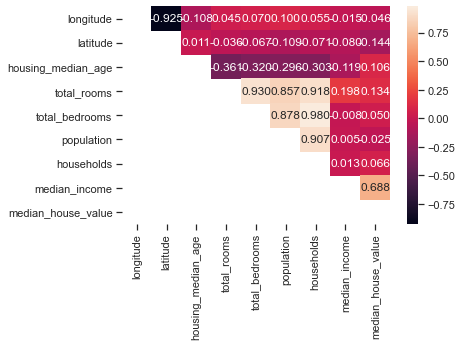

In [33]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

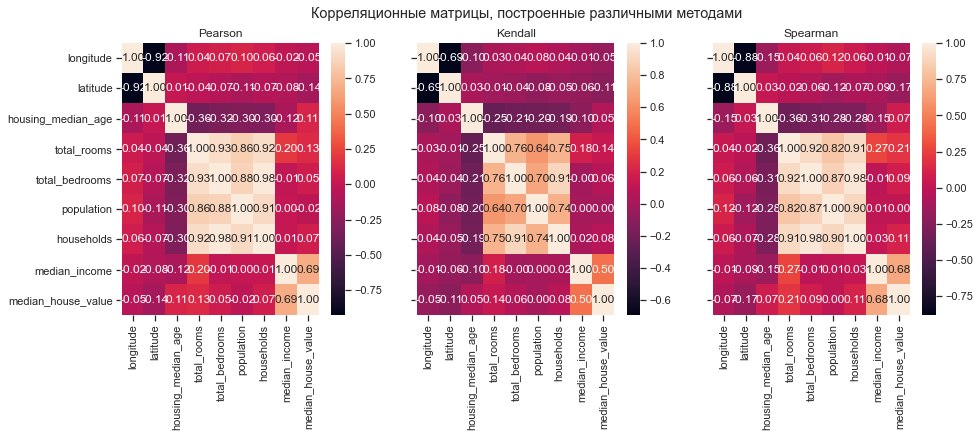

In [34]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')